## PRAVLJENJE EXCEL FAJLA

Napravicemo excel fajl sa 6 kolona i 10 redova sa nasumicno popunjenim brojevima od 1-100 i sacuvati ga u fajlu.


In [25]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [26]:
excel=pd.DataFrame(np.random.randint(1,100, size=(10,6)),columns=[f'Column_{i}' for i in range(1,7)]) 

In [27]:
excel

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6
0,43,94,74,30,6,91
1,67,78,80,4,39,8
2,13,65,93,99,2,11
3,83,57,35,32,91,66
4,57,64,43,96,10,88
5,76,71,40,91,34,95
6,67,91,71,15,17,76
7,61,86,65,20,55,18
8,2,90,96,95,26,83
9,92,89,30,29,3,33


Sada bi zeleli da automatizujemo izradu excel fajlova kako to ne bi rucno radili. Napravicemo funkciju kojom cemo moci da zavisnosti od potrebe menjamo izgled u pogledu broja kolona i redova excel fajla.

In [28]:
def making_excel_file(no_of_rows,no_of_columns,saving_path):
    excel1=pd.DataFrame(np.random.randint(1,100, size=(no_of_rows,no_of_columns)),columns=[f'Column_{i+1}' for i in range(no_of_columns)]) 
    excel1.to_excel(saving_path)
    print(f'Excel file is created and saved in this path: {saving_path}')


In [29]:
path = "/home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba"

Kad smo ovo automatizovali, napravicemo 'for petlju' kako bi automatizovali kolicinu tj. broj fajlova koji nam je potreban.

In [30]:
for i in range (1,10):
    full_path = f'{path}_{i}.xlsx'
    making_excel_file(10,10,full_path)

Excel file is created and saved in this path: /home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_1.xlsx
Excel file is created and saved in this path: /home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_2.xlsx
Excel file is created and saved in this path: /home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_3.xlsx
Excel file is created and saved in this path: /home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_4.xlsx
Excel file is created and saved in this path: /home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_5.xlsx
Excel file is created and saved in this path: /home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_6.xlsx
Excel file is created and saved in this path: /home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_7.xlsx
Excel file is created and saved in this path: /home/mina/mina_vezba_python/MINA_ZAD

Sada cemo napraviti funkciju kojom cemo uvezati i spojiti sve excel fajlove u jedan.

In [31]:
def merge_excel_file(files_path): #ulazni parametri neophodni za f-ju
    excel_paths=glob.glob(os.path.join(files_path, "*.xlsx")) #napravice listu u kojoj ce prema zadatoj putanji traziti fajlove sa xlsx ext
    print(f'Imamo sledece excel fajlove u folderu: {excel_paths}') 
    dataframe=[] #prazna lista u kojoj ce biti izlistani fajlovi iz putanje
    for file in excel_paths: #iteracija kroz xlsx fajlove 
        df=pd.read_excel(file) #citanja xlsx fajla
        df['file_no'] = os.path.basename(file).replace('.xlsx','')
        dataframe.append(df) #prazna lista u koju se dodaju iscitanji xlsx fajlovi
    merge_files=pd.concat(dataframe,ignore_index=True) #spajanje df fajlova
    return merge_files        

In [32]:
putanja_fajlova="/home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file"

In [33]:
working_df=merge_excel_file(putanja_fajlova)

Imamo sledece excel fajlove u folderu: ['/home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_3.xlsx', '/home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_6.xlsx', '/home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_1.xlsx', '/home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_2.xlsx', '/home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_9.xlsx', '/home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_4.xlsx', '/home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_5.xlsx', '/home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_7.xlsx', '/home/mina/mina_vezba_python/MINA_ZADACI/making_excel_file/making_excel_proba_8.xlsx']


In [34]:
len(working_df)

90

In [35]:
working_df=working_df.drop(columns='Unnamed: 0')

In [36]:
working_df

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,file_no
0,39,56,6,54,98,54,92,57,65,39,making_excel_proba_3
1,73,70,81,28,72,78,2,57,3,89,making_excel_proba_3
2,80,63,86,4,53,62,78,40,30,6,making_excel_proba_3
3,63,78,9,68,52,41,5,82,77,91,making_excel_proba_3
4,21,45,7,51,41,18,59,22,41,11,making_excel_proba_3
...,...,...,...,...,...,...,...,...,...,...,...
85,89,25,21,53,71,61,72,84,23,18,making_excel_proba_8
86,51,57,92,97,33,44,38,13,58,80,making_excel_proba_8
87,21,28,70,63,37,88,96,65,37,73,making_excel_proba_8
88,93,91,22,94,4,26,46,31,83,9,making_excel_proba_8


In [37]:
working_df['file_no'].value_counts()

file_no
making_excel_proba_3    10
making_excel_proba_6    10
making_excel_proba_1    10
making_excel_proba_2    10
making_excel_proba_9    10
making_excel_proba_4    10
making_excel_proba_5    10
making_excel_proba_7    10
making_excel_proba_8    10
Name: count, dtype: int64

Sad cemo promeniti sadrzaj kolone file_no sa stvarnim imenima prodavnica. Column_10 nam predstavlja Profit, promenicemo ime kolone takodje.


working_df['file_no']=working_df['file_no'].apply(lambda x:'Store_Belgrade' if x== 'making_excel_proba_3' else x) -ovako bi bilo sa lambda f-jom


In [38]:
stara_imena = ['making_excel_proba_3', 'making_excel_proba_6', 'making_excel_proba_1',
    'making_excel_proba_2', 'making_excel_proba_9', 'making_excel_proba_4',
    'making_excel_proba_5', 'making_excel_proba_7', 'making_excel_proba_8']

nova_imena = ['Store_NoviSad', 'Store_Nis', 'Store_Belgrade',
    'Store_Subotica', 'Store_Kragujevac', 'Store_Zrenjanin',
    'Store_Cacak', 'Store_Sombor', 'Store_Uzice']

In [39]:
working_df['file_no']=working_df['file_no'].replace(dict(zip(stara_imena,nova_imena)))

In [40]:
working_df.rename(columns={'Column_10':'Profit'},inplace=True)

In [41]:
working_df

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Profit,file_no
0,39,56,6,54,98,54,92,57,65,39,Store_NoviSad
1,73,70,81,28,72,78,2,57,3,89,Store_NoviSad
2,80,63,86,4,53,62,78,40,30,6,Store_NoviSad
3,63,78,9,68,52,41,5,82,77,91,Store_NoviSad
4,21,45,7,51,41,18,59,22,41,11,Store_NoviSad
...,...,...,...,...,...,...,...,...,...,...,...
85,89,25,21,53,71,61,72,84,23,18,Store_Uzice
86,51,57,92,97,33,44,38,13,58,80,Store_Uzice
87,21,28,70,63,37,88,96,65,37,73,Store_Uzice
88,93,91,22,94,4,26,46,31,83,9,Store_Uzice


Sad kad imamo sredjenu objedinjenu tabelu, uradicemo neke konkretne analize na njoj. Interesuje nas koliki je profit po prodavnicama.


In [42]:
profit_prodavnice=working_df.groupby('file_no')['Profit'].agg(['sum', 'mean', 'count'])

In [43]:
profit_prodavnice

,sum,mean,count
file_no,,,
Store_Belgrade,516,51.6,10
Store_Cacak,535,53.5,10
Store_Kragujevac,649,64.9,10
Store_Nis,421,42.1,10
Store_NoviSad,534,53.4,10
Store_Sombor,436,43.6,10
Store_Subotica,446,44.6,10
Store_Uzice,459,45.9,10
Store_Zrenjanin,528,52.8,10


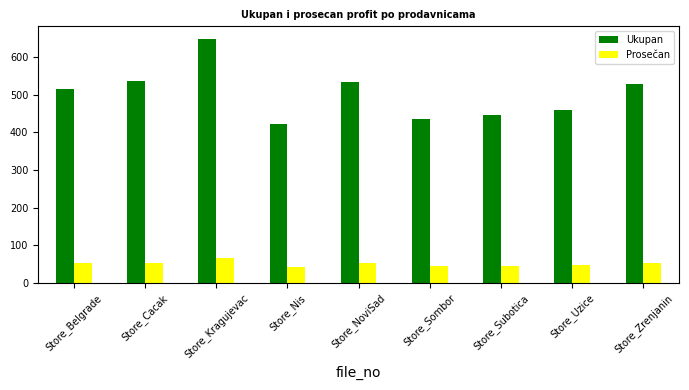

In [44]:
profit_prodavnice[['sum','mean']].plot(kind='bar',figsize=(7,4),color=['green','yellow'])
plt.title('Ukupan i prosecan profit po prodavnicama',fontsize=7,fontweight='bold')
plt.xticks(rotation=45,fontsize=7)
plt.yticks(fontsize=7)
plt.legend(['Ukupan', 'Prosečan'],fontsize=7)
plt.tight_layout()
plt.show()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Kreiraj ExcelWriter sa xlsxwriter engine-om
writer = pd.ExcelWriter('profit_i_grafikon.xlsx', engine='xlsxwriter')

# 2. Snimi tabelu u Excel sheet
profit_prodavnice.to_excel(writer, sheet_name='Profit')

# 3. Kreiraj grafikon i snimi ga kao sliku
fig, ax = plt.subplots(figsize=(7, 4))
profit_prodavnice[['sum', 'mean']].plot(kind='bar', color=['green', 'yellow'], ax=ax)
plt.title('Ukupan i prosečan profit po prodavnicama', fontsize=7, fontweight='bold')
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=7)
plt.legend(['Ukupan', 'Prosečan'], fontsize=7)
plt.tight_layout()
fig.savefig('temp_chart.png')  # snimi sliku grafikona

# 4. Ubaci sliku grafikona u Excel fajl (u isti sheet)
workbook  = writer.book
worksheet = writer.sheets['Profit']
worksheet.insert_image('H2', 'temp_chart.png')  # možeš promeniti H2 ako želiš poziciju

# 5. Zatvori writer da se fajl sačuva
writer.close()

# 6. (opciono) zatvori matplotlib figuru
plt.close(fig)
